# **Лабораторная работа №2. Математическое моделирование текстовых данных учебной аналитики**

# Описание работы

**Цель работы:** сформировать навыки работы с текстовыми данными и реализовать тематическое моделирование текстов.

**Задачи:**


1. Составить собственный корпус текстов, относящихся к тематике учебной аналитики.
2. Провести предобработку данных согласно требованиям исходных данных.
4. Реализовать тематическое моделирование текстов.
5. Объяснить полученные темы.
6. Выявить тексты с самой высокой степенью принадлежности к каждой теме (по 5 документов на каждую тему).
7. Визуализировать кластеры полученных тем.
2. Сделать выводы по работе, обосновать практическое применение полученных тематик.


## Возможные тематики корпуса текстов


*   Научные статьи о сфере образования
*   Отзывы студентов об образовательном процессе
*   Отзывы об образовательных организациях
*   Учебные тексты междисциплинарных направлений
*   Рабочие программы дисциплин
*   Учебная документация







## Обязательные требования


*   Корпус должен состять минимум из 100 документов общим объемом не менее 10 000 слов
*   Количество выделенных тем от 5 до 7



# Подключние необходимых библиотек

In [ ]:
!pip install --upgrade pandas==1.1.0

In [ ]:
!pip install pyLDAvis==2.1.2

In [ ]:
# устанавливаем pymorphy2
!pip install pymorphy2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from bs4 import BeautifulSoup as bs
import requests
import re
import pandas as pd

In [ ]:
import nltk
import string
import gensim
from gensim.utils import simple_preprocess

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import gensim.corpora as corpora

In [ ]:
import nltk # уже знакомая нам библиотека nltk
from nltk.tokenize import word_tokenize # готовый токенизатор библиотеки nltk

In [ ]:
import pyLDAvis
import pyLDAvis.gensim

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
from pprint import pprint

## Разработка функции получения данных

In [ ]:
count = 4
newlink = 'https://sci-article.ru/gryps.php?i=obrazovanie&j='
page = requests.get(newlink + str(count))
soup = bs(page.text, 'html.parser')

In [ ]:
page

In [ ]:
print(soup.prettify())

In [ ]:
test_2 = soup.find_all('div', id='stattext')

In [ ]:
test_2

In [ ]:
a_link = soup.find('div', id='stattext').find('a').get('href')
a_desc = soup.find('div', id='stattext').find('a').text
b_author = soup.find('div', id='stattext').find('b').text

In [ ]:
a_link

In [ ]:
a_desc

In [ ]:
b_author

In [ ]:
b_author_name = b_author.split('.')[1]

In [ ]:
b_author_name

In [ ]:
items = soup.find_all('div', {'class': ['item', 'item even']})

In [ ]:
filteredNews =[]

In [ ]:
film_list = film_list = soup.find('div', {'class': 'templatemo_content_area'})
test_2 = film_list.find_all('div', {'id' : ['stattext']})

In [ ]:
test_2

In [ ]:
filteredNews =[]
for data in test_2:
  a_link = data.find('a').get('href')
  a_desc = data.find('a').text
  b_author = data.find('b').text
  b_author_name = b_author.split('.')[1]
  link_to_news = 'https://sci-article.ru/'
  news_from_box = requests.get(link_to_news + a_link)
  news_soup = bs(news_from_box.text, "html.parser")
  news_text = str(news_soup.find_all('p'))
  news_text = news_text.split('Библиографический список:', 1)[0]
  if news_text.find('УДК') != -1:
    news_text = news_text.split('УДК', 1)[1]
  else:
    news_text = news_text.split('Keywords:', 1)[1]
  # news_text = news_text.split('УДК', 1)[1]
  news_text = re.sub('\[', ' ', news_text)
  news_text = re.sub('\]', ' ', news_text)
  news_text = re.sub('<p>', ' ', news_text)
  news_text = re.sub('</p>', ' ', news_text)
  news_text = re.sub('\\xa0', ' ', news_text)
  news_text = re.sub('<strong>', ' ', news_text)
  news_text = re.sub('</strong>', ' ', news_text)
  news_text = re.sub('\n', '', news_text)
  news_text = re.sub('<ul>', '', news_text)
  news_text = re.sub('</ul>', '', news_text)
  news_text = re.sub('<li>', '', news_text)
  news_text = re.sub('</li>', ' ', news_text)
  news_text = re.sub('<div id="stattextbid">', '', news_text)
  news_text = re.sub('<center>', '', news_text)
  news_text = re.sub('<em>', '', news_text)
  news_text = re.sub('</em>', ' ', news_text)
  filteredNews.append({
      'author': b_author_name,
      'link': a_link,
      'name': a_desc,
      'text': news_text,
      })

In [ ]:
news_text.find('УДК')

In [ ]:
filteredNews

In [ ]:
a_link = soup.find('div', id='stattext').find('a').get('href')

In [ ]:
link_to_news = 'https://sci-article.ru/'
news_from_box = requests.get(link_to_news + a_link)
news_soup = bs(news_from_box.text, "html.parser")
news_text = str(news_soup.find_all('p'))
news_text_1 = news_text.split('Библиографический список:', 1)[0]
news_text_2 = news_text_1.split('УДК', 1)[1]
news_text_3 = re.sub('\[', ' ', news_text_2)
news_text_4 = re.sub('\]', ' ', news_text_3)
news_text_5 = re.sub('<p>', ' ', news_text_4)
news_text_6 = re.sub('</p>', ' ', news_text_5)
news_text_7 = re.sub('\\xa0', ' ', news_text_6)
news_text_8 = re.sub('<strong>', ' ', news_text_7)
news_text_9 = re.sub('</strong>', ' ', news_text_8)
news_text_10 = re.sub('\n', '', news_text_9)
news_text_11 = re.sub('<ul>', '', news_text_10)
news_text_12 = re.sub('</ul>', '', news_text_11)
news_text_13 = re.sub('<li>', '', news_text_12)
news_text_14 = re.sub('</li>', ' ', news_text_13)
news_text_15 = re.sub('<div id="stattextbid">', '', news_text_14)
news_text_16 = re.sub('<center>', '', news_text_15)
news_text_17 = re.sub('<em>', '', news_text_16)
news_text_18 = re.sub('</em>', ' ', news_text_17)

In [ ]:
news_text_18

In [ ]:
link_to_news = 'https://sci-article.ru/'
news_from_box = requests.get(link_to_news + a_link)
news_soup = bs(news_from_box.text, "html.parser")
news_text = str(news_soup.find_all('p'))
news_text = news_text.split('Библиографический список:', 1)[0]
news_text = news_text.split('УДК', 1)[1]
news_text = re.sub('\[', ' ', news_text)
news_text = re.sub('\]', ' ', news_text)
news_text = re.sub('<p>', ' ', news_text)
news_text = re.sub('</p>', ' ', news_text)
news_text = re.sub('\\xa0', ' ', news_text)
news_text = re.sub('<strong>', ' ', news_text)
news_text = re.sub('</strong>', ' ', news_text)
news_text = re.sub('\n', '', news_text)
news_text = re.sub('<ul>', '', news_text)
news_text = re.sub('</ul>', '', news_text)
news_text = re.sub('<li>', '', news_text)
news_text = re.sub('</li>', ' ', news_text)
news_text = re.sub('<div id="stattextbid">', '', news_text)
news_text = re.sub('<center>', '', news_text)
news_text = re.sub('<em>', '', news_text)
news_text = re.sub('</em>', ' ', news_text)

In [ ]:
news_text

In [ ]:
news_text_5_split = news_text_5.split('УДК')

In [ ]:
news_text_5

In [ ]:
#text_test = re.sub("^.*?У", ' ', news_text_5)
text_test = news_text_5.split('Библиографический список:', 1)[0]
text_test2 = text_test.split('УДК', 1)[1]

In [ ]:
text_test

In [ ]:
text_test2

In [ ]:
filteredNews

In [ ]:
for data in test_2:
  print(data)

In [ ]:
links = []
for link in soup.find_all('a'):
    links.append(link.get('href'))

#if link.find('stat.php?i='):
#print(link.get('href'))

# Сбор данных

In [ ]:
def get_content(main_link):
  links = []
  link_to_news = 'https://sci-article.ru/'
  news_data = pd.DataFrame(columns=['Автор', 'Название статьи', 'Текст статьи','Ссылка'])
  for i in range(1, 6):
    newlink = main_link+str(i)
    links.append(newlink)
  for link in links:
    page = requests.get(link)
    soup = bs(page.text, "html.parser")
    info_list = info_list = soup.find('div', {'class': 'templatemo_content_area'})
    test_2 = info_list.find_all('div', {'id' : ['stattext']})
    for data in test_2:
      a_link = data.find('a').get('href')
      a_desc = data.find('a').text
      b_author = data.find('b').text
      b_author_name = b_author.split('.')[1]
      news_from_box = requests.get(link_to_news + a_link)
      news_soup = bs(news_from_box.text, "html.parser")
      news_text = str(news_soup.find_all('p'))
      news_text = news_text.split('Библиографический список:', 1)[0]
      if news_text.find('УДК') != -1:
        news_text = news_text.split('УДК', 1)[1]
      else:
        news_text = news_text.split('Keywords:', 1)[1]
      news_text = re.sub('\[', ' ', news_text)
      news_text = re.sub('\]', ' ', news_text)
      news_text = re.sub('<p>', ' ', news_text)
      news_text = re.sub('</p>', ' ', news_text)
      news_text = re.sub('\\xa0', ' ', news_text)
      news_text = re.sub('<strong>', ' ', news_text)
      news_text = re.sub('</strong>', ' ', news_text)
      news_text = re.sub('\n', '', news_text)
      news_text = re.sub('<ul>', '', news_text)
      news_text = re.sub('</ul>', '', news_text)
      news_text = re.sub('<li>', '', news_text)
      news_text = re.sub('</li>', ' ', news_text)
      news_text = re.sub('<div id="stattextbid">', '', news_text)
      news_text = re.sub('<center>', '', news_text)
      news_text = re.sub('<em>', '', news_text)
      news_text = re.sub('</em>', ' ', news_text)
      news_text = re.sub('<div>', '', news_text)
      news_text = re.sub('</div>', ' ', news_text)
      news_text = re.sub('<div id="stattextbid2">', ' ', news_text)
      news_text = re.sub('<p align="center">', ' ', news_text)
      news_text = re.sub('<ol>', '', news_text)
      news_text = re.sub('</ol>', ' ', news_text)
      news_text = re.sub('<br/>', ' ', news_text)
      df = pd.DataFrame([[str(b_author_name),
                          str(a_desc),
                          str(news_text),
                          str(a_link)]],
                        columns=['Автор', 'Название статьи', 'Текст статьи','Ссылка'])
      news_data = news_data.append(df, ignore_index=True)
  return news_data

In [ ]:
news_data = None

In [ ]:
news_data = get_content('https://sci-article.ru/gryps.php?i=obrazovanie&j=')

In [ ]:
news_data

,Автор,Название статьи,Текст статьи,Ссылка
0,Ерофеева Ирина Алексеевна,Формирование российской гражданской идентичнос...,37.035.6 Введение Российская школа в п...,stat.php?i=1626173728
1,Данилова Ольга Анатольевна,Анализ возможностей современного цифрового обр...,37.02 Введение Помимо получения предметн...,stat.php?i=1620848648
2,Водясова Любовь Петровна,ПОТЕНЦИАЛ МОБИЛЬНЫХ ПРИЛОЖЕНИЙ В ОБУЧЕНИИ РУСС...,372.881.116.11(045) Введение В последнее...,stat.php?i=1616935891
3,Колпакова Анна Олеговна,Индивидуально-психологические качества человека,159.923 Актуальность. С развитием обществ...,stat.php?i=1610138763
4,Луговая Виктория Николаевна,Ключевые проблемы и направления усовершенствов...,378.12 Введение. Одним из путей повышения...,stat.php?i=1608702045
...,...,...,...,...
91,Яковлев Владимир Вячеславович,Философско-педагогическая концепция И. А. Ильи...,37.034 Работа И. А. Ильина «Основы хрис...,stat.php?i=filosofsko-pedagogicheskaya_koncepc...
92,Попова Галина Валентиновна,СТАТИСТИЧЕСКАЯ РАЗРАБОТКА ВАРИАНТОВ ВЫБОРА ВЕК...,"The decision, a choice, development, subject...",stat.php?i=statisticheskaya_razrabotka_variant...
93,Iotova Anelia Ivanova,Музыкальные предпочтения молодых радиослушател...,"radio music format, student, radio station, ...",stat.php?i=kakuyu_muzyku_predpochitayut_slusha...
94,Вольнова Леся Николаевна,Дифференцированный подход как методологическая...,"the differentiated approach, an awkward teen...",stat.php?i=differencirovannyy_podhod_kak_metod...


In [ ]:
news_data.to_csv('/content/drive/MyDrive/New_stuff/7-s sem/7 - Training analyst/Lab_02/news_data.csv')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/New_stuff/7-s sem/7 - Training analyst/Lab_02/news_data.csv')

In [ ]:
data.shape

(96, 5)

In [ ]:
data.head()

,Unnamed: 0,Автор,Название статьи,Текст статьи,Ссылка
0,0,Ерофеева Ирина Алексеевна,Формирование российской гражданской идентичнос...,37.035.6 Введение Российская школа в п...,stat.php?i=1626173728
1,1,Данилова Ольга Анатольевна,Анализ возможностей современного цифрового обр...,37.02 Введение Помимо получения предметн...,stat.php?i=1620848648
2,2,Водясова Любовь Петровна,ПОТЕНЦИАЛ МОБИЛЬНЫХ ПРИЛОЖЕНИЙ В ОБУЧЕНИИ РУСС...,372.881.116.11(045) Введение В последнее...,stat.php?i=1616935891
3,3,Колпакова Анна Олеговна,Индивидуально-психологические качества человека,159.923 Актуальность. С развитием обществ...,stat.php?i=1610138763
4,4,Луговая Виктория Николаевна,Ключевые проблемы и направления усовершенствов...,378.12 Введение. Одним из путей повышения...,stat.php?i=1608702045


# Анализ текстовых данных

## Подготовка данных

In [ ]:
data

,Unnamed: 0,Автор,Название статьи,Текст статьи,Ссылка
0,0,Ерофеева Ирина Алексеевна,Формирование российской гражданской идентичнос...,37.035.6 Введение Российская школа в п...,stat.php?i=1626173728
1,1,Данилова Ольга Анатольевна,Анализ возможностей современного цифрового обр...,37.02 Введение Помимо получения предметн...,stat.php?i=1620848648
2,2,Водясова Любовь Петровна,ПОТЕНЦИАЛ МОБИЛЬНЫХ ПРИЛОЖЕНИЙ В ОБУЧЕНИИ РУСС...,372.881.116.11(045) Введение В последнее...,stat.php?i=1616935891
3,3,Колпакова Анна Олеговна,Индивидуально-психологические качества человека,159.923 Актуальность. С развитием обществ...,stat.php?i=1610138763
4,4,Луговая Виктория Николаевна,Ключевые проблемы и направления усовершенствов...,378.12 Введение. Одним из путей повышения...,stat.php?i=1608702045
...,...,...,...,...,...
91,91,Яковлев Владимир Вячеславович,Философско-педагогическая концепция И. А. Ильи...,37.034 Работа И. А. Ильина «Основы хрис...,stat.php?i=filosofsko-pedagogicheskaya_koncepc...
92,92,Попова Галина Валентиновна,СТАТИСТИЧЕСКАЯ РАЗРАБОТКА ВАРИАНТОВ ВЫБОРА ВЕК...,"The decision, a choice, development, subject...",stat.php?i=statisticheskaya_razrabotka_variant...
93,93,Iotova Anelia Ivanova,Музыкальные предпочтения молодых радиослушател...,"radio music format, student, radio station, ...",stat.php?i=kakuyu_muzyku_predpochitayut_slusha...
94,94,Вольнова Леся Николаевна,Дифференцированный подход как методологическая...,"the differentiated approach, an awkward teen...",stat.php?i=differencirovannyy_podhod_kak_metod...


### Нижний регистр

In [ ]:
# приведение к нижнему регистру
data['Текст статьи'] = data['Текст статьи'].str.lower()
data.head()

,Unnamed: 0,Автор,Название статьи,Текст статьи,Ссылка
0,0,Ерофеева Ирина Алексеевна,Формирование российской гражданской идентичнос...,37.035.6 введение российская школа в п...,stat.php?i=1626173728
1,1,Данилова Ольга Анатольевна,Анализ возможностей современного цифрового обр...,37.02 введение помимо получения предметн...,stat.php?i=1620848648
2,2,Водясова Любовь Петровна,ПОТЕНЦИАЛ МОБИЛЬНЫХ ПРИЛОЖЕНИЙ В ОБУЧЕНИИ РУСС...,372.881.116.11(045) введение в последнее...,stat.php?i=1616935891
3,3,Колпакова Анна Олеговна,Индивидуально-психологические качества человека,159.923 актуальность. с развитием обществ...,stat.php?i=1610138763
4,4,Луговая Виктория Николаевна,Ключевые проблемы и направления усовершенствов...,378.12 введение. одним из путей повышения...,stat.php?i=1608702045


### Удаление пунктуации

In [ ]:
# удаление пунктуации
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# токенизация и удаление пунктуации
def sentences_to_words(sentences):
  for sentence in range(len(sentences)):
    yield(gensim.utils.simple_preprocess(str(sentences[sentence]), deacc=True))  # deacc=True убирает пунктуацию

In [ ]:
data_words = list(sentences_to_words(data['Текст статьи']))
print(data_words[9])

['введение', 'обучение', 'воспитание', 'толерантности', 'как', 'это', 'следует', 'из', 'различных', 'определении', 'этого', 'понятия', 'весьма', 'важныи', 'момент', 'жизни', 'молодых', 'людеи', 'для', 'адекватного', 'их', 'понимания', 'своего', 'поведения', 'существования', 'обществе', 'совмещение', 'одном', 'словосочетании', 'креативность', 'толерантность', 'способствует', 'при', 'правильном', 'подходе', 'обучению', 'воспитанию', 'творчески', 'гуманному', 'реализации', 'личностеи', 'чем', 'мечтают', 'дети', 'их', 'родители', 'актуальность', 'однако', 'большинство', 'родителеи', 'общественно', 'значимых', 'людеи', 'отмечают', 'что', 'примерно', 'до', 'лет', 'дети', 'замкнуты', 'своем', 'внутреннем', 'мире', 'не', 'то', 'чтобы', 'проявляли', 'общественную', 'гуманную', 'активность', 'но', 'чаще', 'всего', 'безразличны', 'поведении', 'своеи', 'семье', 'это', 'подтверждают', 'данные', 'статистики', 'большинство', 'россиян', 'вступает', 'брак', 'возрасте', 'года', 'так', 'было', 'много', '

In [ ]:
print(data_words[5])

['style', 'text', 'align', 'center', 'введение', 'style', 'text', 'align', 'justify', 'аддитивность', 'лат', 'additivus', 'прибавляемыи', 'обычном', 'понятии', 'это', 'своиство', 'математических', 'или', 'физических', 'величин', 'когда', 'их', 'значение', 'отнесенное', 'целому', 'объекту', 'эквивалентно', 'сумме', 'значении', 'величин', 'соответствующих', 'его', 'частям', 'без', 'остатка', 'вопрос', 'читателю', 'отгадаите', 'сколько', 'раз', 'удк', 'системе', 'встречается', 'термин', 'style', 'text', 'align', 'justify', 'при', 'решении', 'задач', 'физике', 'математике', 'приходится', 'встречаться', 'многовековои', 'конкуренциеи', 'аддитивности', 'style', 'text', 'align', 'justify', 'физике', 'это', 'связано', 'тем', 'что', 'нельзя', 'суммировать', 'физические', 'величины', 'имеющие', 'не', 'одинаковые', 'размерности', 'например', 'кг', 'умножать', 'можно', 'например', 'кг', 'на', 'тому', 'же', 'аддитивность', 'физических', 'величин', 'довольно', 'редкое', 'своиство', 'часто', 'зависит'

### Лемматизация и стемминг

In [ ]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

In [ ]:
def text_lemmatizer(sentences):
  data_words_lemmatized=[]
  for sentence in range(len(sentences)):
    sentence_lemms = []
    for word in sentences[sentence]:
      lemma = str(pymorphy2_analyzer.parse(word)[0].normal_form)
      sentence_lemms.append(lemma)
    data_words_lemmatized.append(sentence_lemms)
  return data_words_lemmatized

In [ ]:
data_words_lemmatized = list(text_lemmatizer(data_words))
data_words_lemmatized[1][:10]

['введение',
 'помимо',
 'получение',
 'предметный',
 'результат',
 'развитие',
 'узкий',
 'компетенция',
 'школьник',
 'фгос']

In [ ]:
count = 0
for i in range(0, len(data_words_lemmatized)):
  count += len(data_words_lemmatized[i])
count

195917

### Удаление стоп слов

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')

In [ ]:
stop_words.extend(['это', 'сама', 'какие', 'пока', 'ещё', 'оба',
                   'свои', 'либо', 'хотя', 'нужно', 'знаю', 'кого',
                   'вообще', 'поэтому', 'которые', 'каждый', 'весь',
                   'нужный', 'должный', 'мочь', 'иметь', 'гораздо',
                   "стать","например","просто","каждыи","определенныи",
                   "такои", 'которыи',"должныи","именно","нужныи",
                   "какои",'который', 'часть','обычно','использоваться',
                   'простой','большой','всё','самый','очень','свой',
                   'сложный', "td", "pt", "border", "mso", 'width',
                   'top', 'span', 'style', 'valign', 'tr', 'alt',
                   'solid', 'solid_windowtext', 'class_msonormal',
                   'right','text_align_justify',
                   'nowrap_nowrap','none','bottom','spacerun_yes',
                   'left_alt','line_height','left_none',
                   'data_mce_mark','cm','margin_bottom',
                   'padding_cm','height','spacerun_yes',
                   'text_align_justify','text','data_mce_mark_data',
                   'windowtext_padding_class_msonormal',
                   'margin_text','data_mce_mark',
                   'align_justify_line','nowrap_nowrap','div_text',
                   'align_justify','детея','left_left_background',
                   'div_align_justify','align_justify',
                   'spacerun_yes','data_mce_mark','nowrap_nowrap',
                   'data_mce_mark_data','google','div','align',
                   'justify','data','mce','mark','nowrap',
                   'decoration','underline','yes','spacerun',
                   '_','center','тип','class','msonormal','margin',
                   'line','left','black','themecolor','windowtext',
                   'padding','indent','en','us','lang','ansi',
                   'em','bidi','font','normal','диа','la','de',
                   'color','vous','ваш','monsieur','nous',
                   'bgp','as','bt','vl','fs','fu','lc','sv','ko','mle',
                   'moodle','hb','fk','iz','vn','pj','fn','du','yw',
                   'эор','оон','http','https','рф','ru','рис',
                   'ascii','family','calibri','hansi','theme',
                   'minor','latin','fareast','adj','ly','vq','fv',
                   'ka','tl','ki','xg','ue','bo','pw','mx','ff',
                   'ao','bs','dd','fd','zo','ud','jo','uv','op',
                   'ur','kw','pb','oi','sg','oo','pk','to','ospf',
                   'также','background','size','small','transparent',
                   'lego','no','hq','vr','pn','vv','strong','weight',
                   'буква','dp','ob','ld','ac','dh','ot','tt','pr',
                   'qc','fx','za','wq','ck','language','com','di',
                   'img','src','pic','net','tableparagraph','вид',
                   'western','oz','sa','kv','in','is','ls','uy','bh',
                   'yd','colspan','cx','wn','dy','ha','do','xz',
                   'vx','xs','lr','xp','ja','ипт','a','b','c','d','e',
                   'f','g','h','i','j','k','l','m','o','p','q','r','s','t',
                   'u','v','w','x','y','z','nfc','nf','cb','tg',
                   'aq','lb','vo','vf','ni','zy','xj','uk','edit',
                   'router_','router','auto','interfaces','др',
                   'cloud','computing','nm','lf','bx','zh','ft',
                   'zt','hk','yn','dt','vh','gv','by','blog','ll',
                   'ii','ux','rk','php','double_double','double',
                   'blogspot','lj','ej','zz','li','xt','ze',
                   'zv','fr','ef','sub','eb'])

In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [ ]:
data_words_nostops = remove_stopwords(data_words_lemmatized)

In [ ]:
data_words_nostops[1][:10]

['введение',
 'помимо',
 'получение',
 'предметный',
 'результат',
 'развитие',
 'узкий',
 'компетенция',
 'школьник',
 'фгос']

In [ ]:
count = 0
for i in range(0, len(data_words_nostops)):
  count += len(data_words_nostops[i])
count

130600

### Векторизация

In [ ]:
# Создание биграмм
def make_bigrams(texts):
  bigram = gensim.models.Phrases(texts, min_count=5, threshold=100)
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  return [bigram_mod[doc] for doc in texts]

In [ ]:
data_bigrams = make_bigrams(data_words_nostops)

In [ ]:
data_bigrams[1][:10]

['введение',
 'помимо',
 'получение',
 'предметный',
 'результат',
 'развитие',
 'узкий',
 'компетенция',
 'школьник',
 'фгос']

In [ ]:
count = 0
for i in range(0, len(data_bigrams)):
  count += len(data_bigrams[i])
count

126634

In [ ]:
# Создание триграмм
def make_trigrams(texts):
  bigram = gensim.models.Phrases(texts, min_count=5, threshold=100)
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram = gensim.models.Phrases(bigram[texts], threshold=100)  
  trigram_mod = gensim.models.phrases.Phraser(trigram)
  return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
data_trigrams = make_trigrams(data_words_nostops)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
data_trigrams[1][:11]

['введение',
 'помимо',
 'получение',
 'предметный',
 'результат',
 'развитие',
 'узкий',
 'компетенция',
 'школьник',
 'фгос',
 'ноо']

In [ ]:
count = 0
for i in range(0, len(data_trigrams)):
  count += len(data_trigrams[i])
count

125771

## Тематическое моделирование

### Латентное размещение Дирихле

In [ ]:
# Создаем словарь
id2word = corpora.Dictionary(data_trigrams)
# Определяем частоту документа в корпусе
corpus = [id2word.doc2bow(text) for text in data_trigrams]

In [ ]:
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 3), (16, 2), (17, 2), (18, 1), (19, 6), (20, 3), (21, 1), (22, 4), (23, 2), (24, 1), (25, 3), (26, 1), (27, 1), (28, 3), (29, 2), (30, 3), (31, 1), (32, 2), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 2), (48, 2), (49, 4), (50, 2), (51, 7), (52, 3), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 18), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 2), (72, 1), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 1), (79, 4), (80, 1), (81, 1), (82, 2), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 6), (91, 1), (92, 3), (93, 1), (94, 1), (95, 3), (96, 1), (97, 1), (98, 3), (99, 1), (100, 1), (101, 2), (102, 2), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                            id2word=id2word,
                                            random_state=100,
                                            num_topics=7,
                                            chunksize=100,
                                            minimum_probability=0.1,
                                            passes = 10,
                                            iterations = 100,
                                            per_word_topics=True)

In [ ]:
# Вывод полученных тем
lda_model.print_topics(lda_model.num_topics)

[(0,
  '0.009*"работа" + 0.006*"образование" + 0.006*"процесс" + 0.006*"студент" + 0.005*"обучение" + 0.005*"система" + 0.004*"информация" + 0.004*"учебный" + 0.004*"возможность" + 0.004*"ученик"'),
 (1,
  '0.008*"образование" + 0.007*"человек" + 0.006*"процесс" + 0.006*"деятельность" + 0.005*"обучение" + 0.005*"учиться" + 0.005*"развитие" + 0.005*"работа" + 0.004*"являться" + 0.004*"личность"'),
 (2,
  '0.011*"решение" + 0.010*"исследование" + 0.008*"игра" + 0.007*"деятельность" + 0.007*"развитие" + 0.007*"задача" + 0.006*"научный" + 0.006*"управление" + 0.006*"образование" + 0.006*"результат"'),
 (3,
  '0.003*"обучение" + 0.003*"перфекционизм" + 0.002*"мобильный" + 0.001*"публикация" + 0.001*"учебный" + 0.001*"система" + 0.001*"студент" + 0.001*"работа" + 0.001*"средство" + 0.001*"возможность"'),
 (4,
  '0.014*"учебный" + 0.011*"обучение" + 0.007*"процесс" + 0.006*"материал" + 0.006*"деятельность" + 0.006*"студент" + 0.006*"работа" + 0.005*"обучаться" + 0.005*"технология" + 0.004*"ди

#### Визуализация

In [ ]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

In [ ]:
pyLDAvis.display(vis)

## Критерии качества тематических моделей

In [ ]:
from gensim.models import CoherenceModel

perplexity = lda_model.log_perplexity(corpus)

In [ ]:
print('\nPerplexity: ', perplexity)

coherence_model_lda = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (u_mass): ', coherence_lda)

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_trigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (c_v): ', coherence_lda)


Perplexity:  -8.85314155038808

Coherence Score (u_mass):  -0.9305223110544061

Coherence Score (c_v):  0.5523584129499307


## Поиск оптимального количества тем для LDA

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                random_state=100,
                                                num_topics=num_topics,
                                                minimum_probability=0.1,
                                                passes = 10,
                                                iterations = 100,
                                                per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Займет примерно 2 минуты
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_trigrams, start=2, limit=12, step=1)

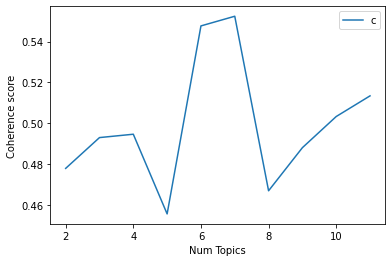

In [ ]:
# Нарисовать граф
limit=12; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.478
Num Topics = 3  has Coherence Value of 0.4931
Num Topics = 4  has Coherence Value of 0.4947
Num Topics = 5  has Coherence Value of 0.4558
Num Topics = 6  has Coherence Value of 0.5476
Num Topics = 7  has Coherence Value of 0.5524
Num Topics = 8  has Coherence Value of 0.4671
Num Topics = 9  has Coherence Value of 0.4881
Num Topics = 10  has Coherence Value of 0.5034
Num Topics = 11  has Coherence Value of 0.5135


## Поиск доминирующей темы в каждом тексте

In [ ]:
# Выбор лучше модели и топиков в ней из результатов выше
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.009*"работа" + 0.006*"образование" + 0.006*"процесс" + 0.006*"студент" + '
  '0.005*"обучение" + 0.005*"система" + 0.004*"информация" + 0.004*"учебный" + '
  '0.004*"возможность" + 0.004*"ученик"'),
 (1,
  '0.008*"образование" + 0.007*"человек" + 0.006*"процесс" + '
  '0.006*"деятельность" + 0.005*"обучение" + 0.005*"учиться" + '
  '0.005*"развитие" + 0.005*"работа" + 0.004*"являться" + 0.004*"личность"'),
 (2,
  '0.011*"решение" + 0.010*"исследование" + 0.008*"игра" + '
  '0.007*"деятельность" + 0.007*"развитие" + 0.007*"задача" + 0.006*"научный" '
  '+ 0.006*"управление" + 0.006*"образование" + 0.006*"результат"'),
 (3,
  '0.003*"обучение" + 0.003*"перфекционизм" + 0.002*"мобильный" + '
  '0.001*"публикация" + 0.001*"учебный" + 0.001*"система" + 0.001*"студент" + '
  '0.001*"работа" + 0.001*"средство" + 0.001*"возможность"'),
 (4,
  '0.014*"учебный" + 0.011*"обучение" + 0.007*"процесс" + 0.006*"материал" + '
  '0.006*"деятельность" + 0.006*"студент" + 0.006*"работа" + 0.005

In [ ]:
for i, j in enumerate(optimal_model[corpus]):
  j = sorted(j[0], key=lambda tup: tup[0])
  print(i, j)

In [ ]:
# Функция поиска доминирующей темы в каждом документе

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Инициализируем вход
    sent_topics_df = pd.DataFrame()
    # Получаем главную тему в каждом документе
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Получаем доминирующую тему, значение доминирования
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4)]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution']
    # AДобавляем оригинальный текст статьи в конец выходной таблицы
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_list)

# Форматируем
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Text']

# Выводим
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Text
0,0,1.0,0.9990,"[0, Ерофеева Ирина Алексеевна, Формирование ..."
1,1,4.0,0.9995,"[1, Данилова Ольга Анатольевна, Анализ возмож..."
2,2,1.0,0.7329,"[2, Водясова Любовь Петровна, ПОТЕНЦИАЛ МОБИЛ..."
3,3,1.0,0.9989,"[3, Колпакова Анна Олеговна, Индивидуально-..."
4,4,1.0,0.9992,"[4, Луговая Виктория Николаевна, Ключевые про..."
5,5,4.0,0.7862,"[5, Мирмович Эдуард Григорьевич, МАТЕМАТИЧЕСК..."
6,6,1.0,0.9986,"[6, Баёва Анастасия Александровна, Наставниче..."
7,7,6.0,0.9602,"[7, Латышев Кирилл Игоревич, Особенности ан..."
8,8,0.0,0.9174,"[8, Лябин Михаил Павлович, Особенности приме..."
9,9,0.0,0.6158,"[9, Олевский Виктор Аронович, Анализ необходи..."


In [ ]:
# Группируем самый явно-принадлежащий текст к каждой теме
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')
for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)],
                                            axis=0)
# Удаляем индексы тем (статей)  
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Форматируем вывод
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Text"]

# Выводим
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Text
0,0.0,0.9996,"[28, Каширина Татьяна Вячеславовна, GOOGLE-СЕ..."
1,1.0,0.9996,"[21, Сахненко Виктор Григорьевич, ДЕМОКРАТИЧЕ..."
2,2.0,0.9996,"[71, Попова Галина Валентиновна, ОБРАЗОВАТЕЛЬ..."
3,3.0,1.0000,"[53, Потапчук Ольга Игоревна, МОБИЛЬНЫЕ ИНФОР..."
4,4.0,0.9997,"[95, Копылов Олег Владимирович, Практическая ..."
5,5.0,0.9996,"[24, Бойко Сергей Сергеевич, СТРАТЕГИЧЕСКОЕ Р..."
6,6.0,0.9997,"[91, Яковлев Владимир Вячеславович, Философск..."


In [ ]:
# Теперь найдем топ 5 текстов для каждой темы
# Вытащим информацию в одельный лист
testtt = list(sent_topics_outdf_grpd)

In [ ]:
# Топ 5 текстов для темы 1
theme_1 = testtt[0][1].sort_values(['Perc_Contribution'], ascending=[0]).head(5)
theme_1 = theme_1.reset_index(drop=True)
theme_1

,Dominant_Topic,Perc_Contribution,0
0,0.0,0.9996,"[28, Каширина Татьяна Вячеславовна, GOOGLE-СЕ..."
1,0.0,0.9994,"[69, Вольнова Леся Николаевна, ОСОБЕННОСТИ СО..."
2,0.0,0.9994,"[42, Мхитарян Артур Арменович, ВИЗУАЛЬНОЕ САМ..."
3,0.0,0.9993,"[93, Iotova Anelia Ivanova, Музыкальные предп..."
4,0.0,0.9993,"[49, Гужвенко Елена Ивановна, Применение Exce..."


In [ ]:
# Топ 5 текстов для темы 2
theme_2 = testtt[1][1].sort_values(['Perc_Contribution'], ascending=[0]).head(5)
theme_2 = theme_2.reset_index(drop=True)
theme_2

,Dominant_Topic,Perc_Contribution,0
0,1.0,0.9996,"[21, Сахненко Виктор Григорьевич, ДЕМОКРАТИЧЕ..."
1,1.0,0.9995,"[39, Буланова Маргарита Вернеровна, Роль обра..."
2,1.0,0.9995,"[18, Боровиков Алексей Петрович, Формирование..."
3,1.0,0.9994,"[57, Куваева Евгения Николаевна, ВЛИЯНИЕ ИНФО..."
4,1.0,0.9993,"[86, Лебедева Ирина Владимировна, Деятельност..."


In [ ]:
# Топ 5 текстов для темы 3
theme_3 = testtt[2][1].sort_values(['Perc_Contribution'], ascending=[0]).head(5)
theme_3 = theme_3.reset_index(drop=True)
theme_3

,Dominant_Topic,Perc_Contribution,0
0,2.0,0.9996,"[71, Попова Галина Валентиновна, ОБРАЗОВАТЕЛЬ..."
1,2.0,0.9996,"[72, Попова Галина Валентиновна, Современное ..."
2,2.0,0.9996,"[75, Попова Галина Валентиновна, ИНФОРМАЦИОНН..."
3,2.0,0.9994,"[70, Попова Галина Валентиновна, СОВРЕМЕННОЕ ..."
4,2.0,0.9994,"[92, Попова Галина Валентиновна, СТАТИСТИЧЕСК..."


In [ ]:
# Топ 5 текстов для темы 4
theme_4 = testtt[3][1].sort_values(['Perc_Contribution'], ascending=[0]).head(5)
theme_4 = theme_4.reset_index(drop=True)
theme_4

,Dominant_Topic,Perc_Contribution,0
0,3.0,1.0,"[53, Потапчук Ольга Игоревна, МОБИЛЬНЫЕ ИНФОР..."


In [ ]:
# Топ 5 текстов для темы 5
theme_5 = testtt[4][1].sort_values(['Perc_Contribution'], ascending=[0]).head(5)
theme_5 = theme_5.reset_index(drop=True)
theme_5

,Dominant_Topic,Perc_Contribution,0
0,4.0,0.9997,"[95, Копылов Олег Владимирович, Практическая ..."
1,4.0,0.9996,"[60, Васин Евгений Константинович, Функции пр..."
2,4.0,0.9995,"[1, Данилова Ольга Анатольевна, Анализ возмож..."
3,4.0,0.9994,"[43, Стручков Егор Спартакович, Использование..."
4,4.0,0.9992,"[32, Потапчук Ольга Игоревна, МОБИЛЬНЫЕ ТЕХНО..."


In [ ]:
# Топ 5 текстов для темы 6
theme_6 = testtt[5][1].sort_values(['Perc_Contribution'], ascending=[0]).head(5)
theme_6 = theme_6.reset_index(drop=True)
theme_6

,Dominant_Topic,Perc_Contribution,0
0,5.0,0.9996,"[24, Бойко Сергей Сергеевич, СТРАТЕГИЧЕСКОЕ Р..."
1,5.0,0.9991,"[16, Любко Ксения Сергеевна, Сравнительный а..."
2,5.0,0.9990,"[33, Севиринова Елена Владимировна, Проблема ..."
3,5.0,0.9818,"[47, Коломиец Анна Ивановна, Целесообразность..."
4,5.0,0.9809,"[10, Игнатенко Анастасия Андреевна, Информаци..."


In [ ]:
# Топ 5 текстов для темы 7
theme_7 = testtt[6][1].sort_values(['Perc_Contribution'], ascending=[0]).head(5)
theme_7 = theme_7.reset_index(drop=True)
theme_7

,Dominant_Topic,Perc_Contribution,0
0,6.0,0.9997,"[91, Яковлев Владимир Вячеславович, Философск..."
1,6.0,0.9996,"[87, Спиридонов Борис Александрович, Проект «..."
2,6.0,0.9995,"[52, Кузьменко Игорь Николаевич, СИСТЕМА ЖИЗ..."
3,6.0,0.9602,"[7, Латышев Кирилл Игоревич, Особенности ан..."
4,6.0,0.9535,"[25, Адибекян Оганес Александрович, Причастно..."
